## Creating a taxonomy from a website

#### Let us create a product taxonomy using owlready
We first need to install owlready2 and beautiful soup (for accessing website content):

In [1]:
!pip install bs4
!pip install owlready2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.4/27.4 MB 2.6 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for owlready2: filename=owlready2-0.46-cp310-cp310-linux_x86_64.whl size=23551460 sha256=cad0cbedde2448f0ddca0b574caa6e66c455ec8369035f7aba9f058ce8fb958e
  Stored in directory: /home/jovyan/.cache/pip/wheels/bf/6f/ef/35df148baa59fc6b243aca4f101e17aed14b67dc1166b73fe0
Successfully built owlready2


### Let us now import the needed libraries

In [3]:
import requests
from bs4 import BeautifulSoup	#HTML handler
from owlready2 import *
import time
import json

### Continue with loading the ontology and defining the namespace

In [4]:
onto = get_ontology('http://ProductTaxonomyFromLidl.owl#')

# create a basic product class
with onto:
    class Product(Thing):
        label = ['Product']
        pass

### Now let us declare the website we are gonna access

In [5]:
base_url = "https://www.lidl.co.uk/c/our-products/s10023093"

### This is the website we are gonna access. You can take a different one if you like

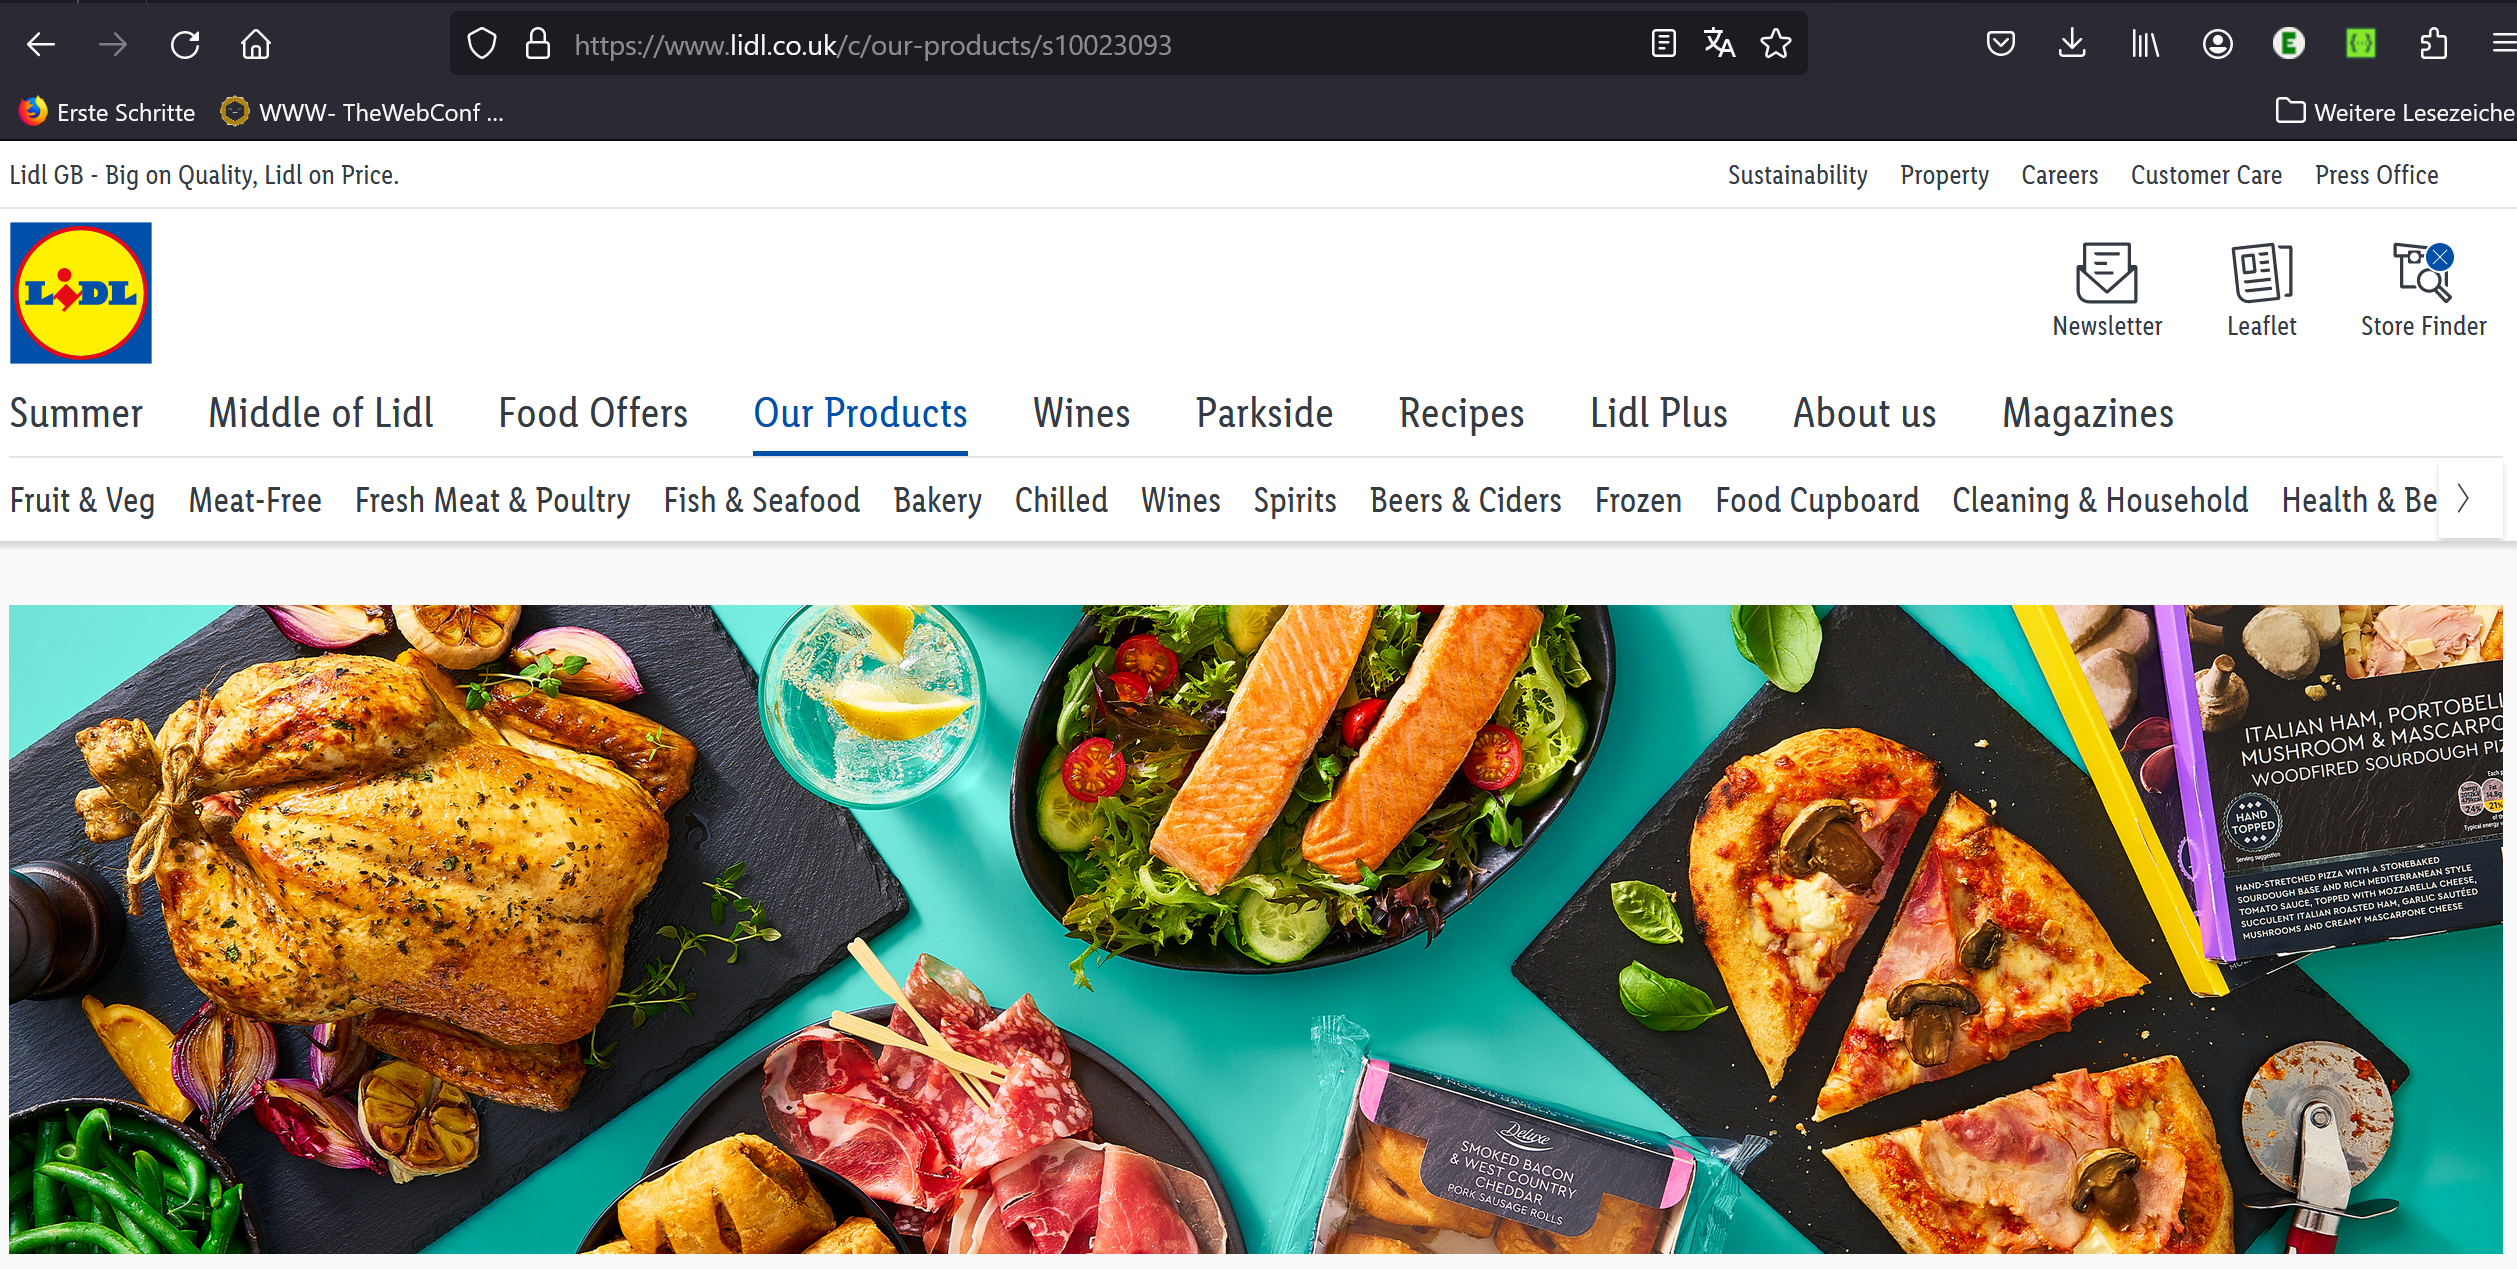

## Right-click on the website and inspect the sourcecode. There, you can find tags that link to the subclasses you want to extract.
### In this case, we are interested in retrieving the classes "Fruit & Veg", "Meat-Free" ...
#### The program shall extract the names of the subclasses, open the link to the page of the subclasses, and again extract the names of the subclasses. With this, we create a product taxonomy

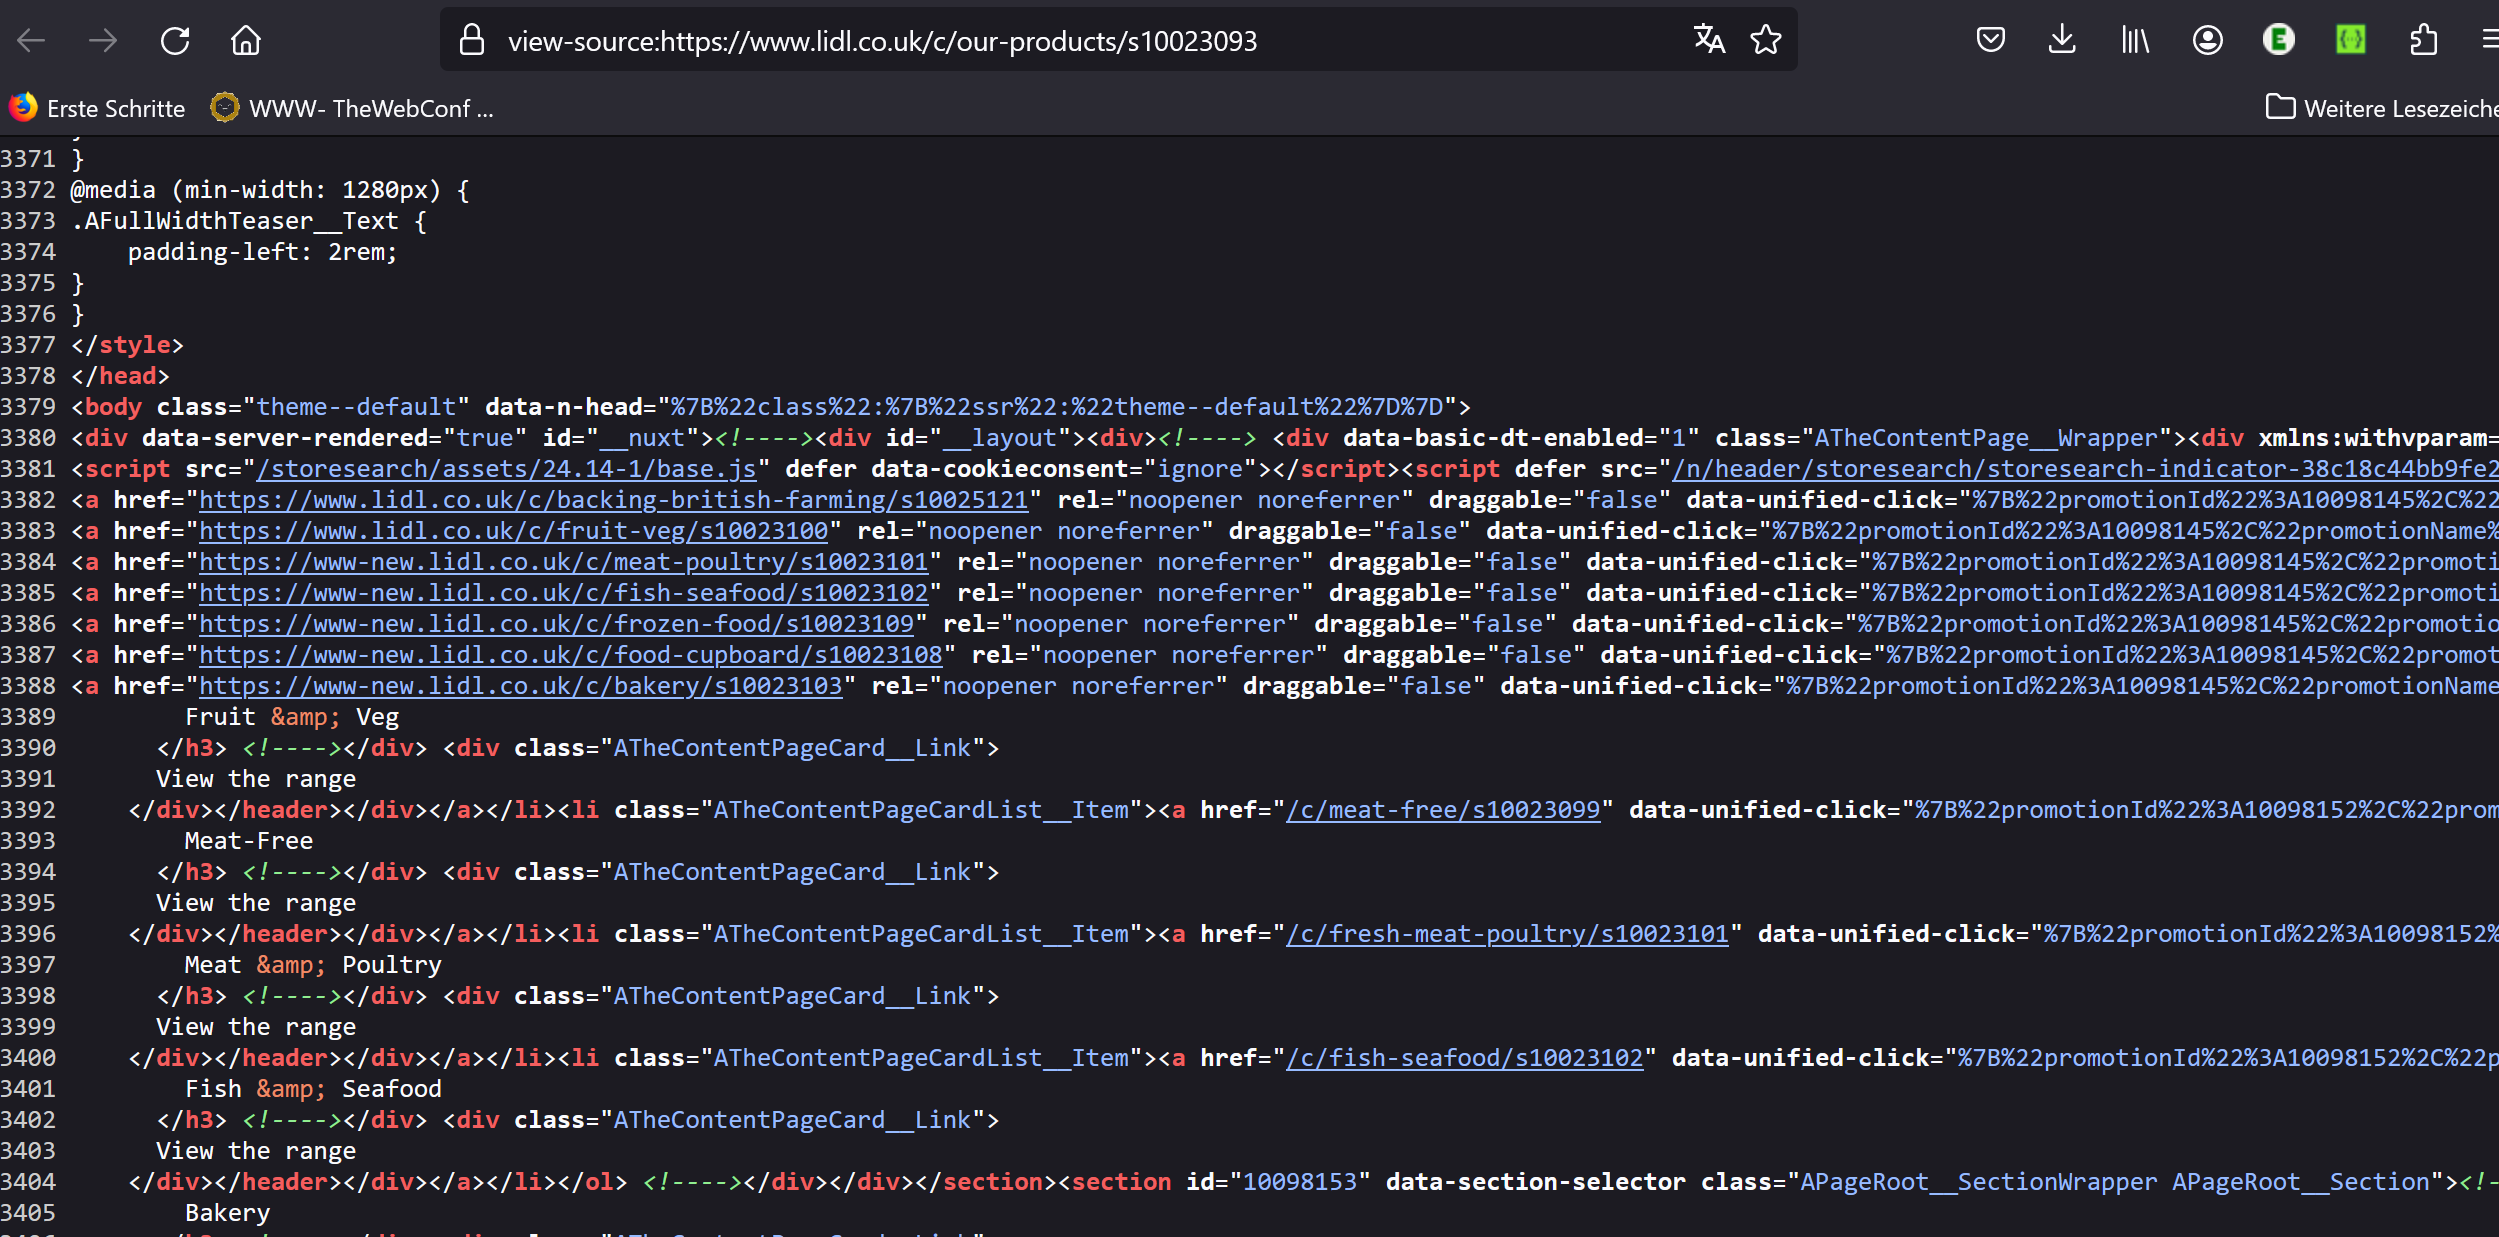

### In the source you see the links to the subpages, e.g. "https://www.lidl.co.uk/c/fruit-veg/s10023100"

#### below the list with links, you then see the product category names, e.g. "Fruit &amp; Veg"

### Now let us use beautiful soup to scrape the page

In [16]:
# assign lidl base url for subclasses
lidlurl = "https://www.lidl.co.uk"

# access the URL
response = requests.get(base_url)

# create a HTML parser
soup = BeautifulSoup(response.text, 'html.parser')

# search for all links in the source code (searching for 'a')
for x in soup.find_all('a', href=True):
    # extract the link
    subpagelink = x.get('href')
    # for each link in the file, find the header
    for header in x.find_all('h3'):
        with onto:
            # extract the class label
            class_label = header.text.replace('\n', '')
            # replace strings (not necessary but nice)
            class_name = class_label.replace(' ', '').replace('&', 'And')
            # print the names, to check if you are doing it correctly
            print(class_name)
            # create new subclasses for the main class
            product_category = types.new_class(class_name, (onto.Product,))
            # append the label to the class
            product_category.label.append(class_label)
            # check for children pages: change the URL, access the page and check if subclasses are there
            nextresponse = requests.get(lidlurl+subpagelink)
            childlink = BeautifulSoup(nextresponse.text,"html.parser")
            if childlink.find('h3') is not None:
                    for scndheader in childlink.find_all('h3'):
                        with onto:
                            # extract the class label
                            antherclass_label = scndheader.text.replace('\n', '')
                            # replace strings (not necessary but nice)
                            antherclass_name = antherclass_label.replace(' ', '').replace('&', 'And')
                            # print the names, to check if you are doing it correctly
                            print(antherclass_name)
                            # create new subclasses for the main class
                            product_subcategory = types.new_class(antherclass_name, (product_category,))
                            # append the label to the class
                            product_subcategory.label.append(antherclass_label)
            

FruitAndVeg

ClickheretobrowsethelatestPickoftheWeekoffers.
BritishApples
RedTractor
BigOnFreshBritishCarrots
RainforestAlliance
Fairtrade
LEAFCertified
Ourpledgeformoreveg
Meat-Free
Meat-FreeProducts
Meat-FreeRecipeCollection
LidlChangesForTheBetter
HighFibreBreakfastSmoothieBowl
PunchyBlackBeanSmashBurgers
BBQGlazedCornOnTheCob
MeatAndPoultry
Beef
Pork,BaconAndSausages
ChickenAndTurkey
Lamb

BackingBritishFarming
WelfareWindows
RedTractor
RSPCA
FishAndSeafood

SustainableSeafood
MSCcertified
PreventedOceanPlastic
SeafoodFideuà
BarbecueFishQuesadillaPockets
SaltySeaDogs
Bakery
PunchyBlackBeanSmashBurgers
CroissantBreadWithPearSauce
CheesyPaniniCroutons
Chilled
Eggs,CheeseAndDairy
Delicatessen
ChilledPizzasAndPasta
ChilledReadyMeals
ChilledDessert
ChilledJuicesAndSmoothies
FrozenFood
FrozenFruitAndVeg
FrozenFishAndSeafood
FrozenReadyMealsAndPizzas
IceCreamAndFrozenDesserts
Freshasparagusandfetabake
Zingylemonchickentraybake
Spicypeapotatocakes
FoodCupboard
Jams,HoneyAndSpreads
Rice,Pas

### Test if the classes were assigned correctly

In [17]:
for cls in onto.classes():
    print(cls.label)

['Product']
['        Fruit & Veg       ', '        Fruit & Veg       ', '        Fruit & Veg       ', '        Fruit & Veg       ', '        Fruit & Veg       ', '        Fruit & Veg       ', '        Fruit & Veg       ', '        Fruit & Veg       ', '        Fruit & Veg       ', '        Fruit & Veg       ', '        Fruit & Veg       ']
['        Meat-Free      ', '        Meat-Free      ', '        Meat-Free      ', '        Meat-Free      ', '        Meat-Free      ', '        Meat-Free      ', '        Meat-Free      ', '        Meat-Free      ', '        Meat-Free      ', '        Meat-Free      ']
['        Meat & Poultry      ', '        Meat & Poultry      ', '        Meat & Poultry      ', '        Meat & Poultry      ', '        Meat & Poultry      ', '        Meat & Poultry      ', '        Meat & Poultry      ', '        Meat & Poultry      ', '        Meat & Poultry      ', '        Meat & Poultry      ']
['        Fish & Seafood      ', '        Fish & Seafood      ', 

### Save the ontology and download to manually check

In [18]:
onto.save(file = "ProductTaxonomyFromLidl.owl", format = "rdfxml")